In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
# Load dataset into Pandas DataFrame
statements = pd.read_csv("dataset/Statements/statements.csv")
statements.columns

Index(['Statement', 'Emotion'], dtype='object')

In [117]:
# Markup:: Data Splitting

In [118]:
# Split data now to avoid "leaking"
# We need training data and validation data
from sklearn.model_selection import train_test_split

X = statements["Statement"].copy()
y = statements["Emotion"].copy()
testSize = 0.20
randomState = 474

In [119]:
XTrainRaw, XValidRaw, yTrain, yValidate = \
    train_test_split(X, y, test_size=testSize, random_state=randomState)

In [120]:
# Markup:: Data Vectorization, Text Extraction , reintroduce variable names used in last block

In [121]:
# Using Term Frequency - Inverse Document Frequency
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

maxFeatures = 2600
minDf = 7
maxDf = 0.8
stopWords = stopwords.words("english")

In [122]:
tfIdfVectorizer = TfidfVectorizer(max_features=maxFeatures, min_df=minDf, max_df=maxDf, stop_words=stopWords)
XTrain = tfIdfVectorizer.fit_transform(XTrainRaw).toarray()
XTrain.shape

(16000, 2527)

In [123]:
# Markup:: The Model

In [124]:
# Create the Random Forest Classifier Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

nEstimators = 25
modelRandomState = 887

In [125]:
model = RandomForestClassifier(n_estimators=nEstimators, random_state=modelRandomState)
model = model.fit(XTrain, yTrain)
predictionsTrain = model.predict(XTrain)

Accuracy on XTrain: 0.9959


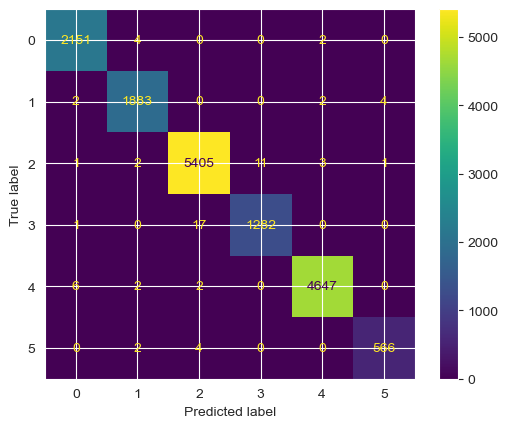

In [147]:
disp = ConfusionMatrixDisplay(confusion_matrix(yTrain, predictionsTrain))
disp.plot()

print(f"Accuracy on XTrain: {accuracy_score(yTrain, predictionsTrain):.4f}")

In [127]:
XValidate = tfIdfVectorizer.transform(XValidRaw).toarray()
print(f"X_val.shape = {XValidate.shape}")

X_val.shape = (4000, 2527)


Accuracy on XTrain: 0.8778


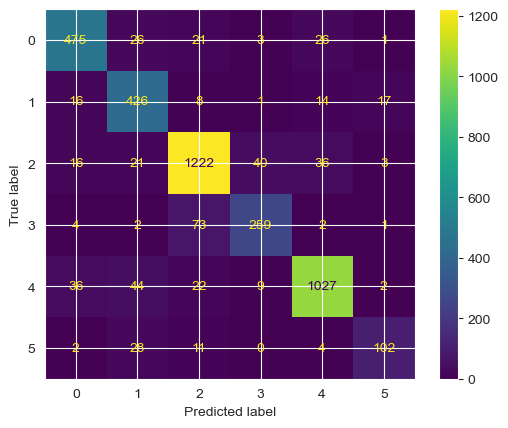

In [148]:
predictions_val = model.predict(XValidate)
disp = ConfusionMatrixDisplay(confusion_matrix(yValidate, predictions_val))
disp.plot()
print(f"Accuracy on XTrain: {accuracy_score(yValidate, predictions_val):.4f}")

In [134]:
y_train_pred_prob = model.predict_proba(XTrain)
y_train_pred = model.predict(XTrain)
y_val_pred_prob = model.predict_proba(XValidate)
y_val_pred = model.predict(XValidate)
train_loss = log_loss(yTrain, y_train_pred_prob)
train_acc = accuracy_score(yTrain, y_train_pred)
val_loss = log_loss(yValidate, y_val_pred_prob)
val_acc = accuracy_score(yValidate, y_val_pred)
metrics = [train_loss, val_loss, train_acc, val_acc]

In [137]:
XTest = tfIdfVectorizer.transform(statements['Statement']).toarray()
print(f"X_test.shape = {XTest.shape}")
type(XTest)

X_test.shape = (20000, 2527)


numpy.ndarray

In [138]:
predictions_test = model.predict(XTest)
predictions_test[:10]

array(['anger', 'anger', 'sadness', 'anger', 'joy', 'anger', 'anger',
       'anger', 'sadness', 'anger'], dtype=object)

In [152]:
statements["Predictions"] = predictions_test
pd.set_option("display.max_colwidth", 240)
statements.head(n=10)

,Statement,Emotion,predictions,Predictions
0,a boyfriend with whom i split up with came over to a friends house where i was visiting with a male friend in a confrontation in another room he tried to find out if i was aroused by my friend by feeling my parts,anger,anger,anger
1,a certain friend tried to push me off a seat in a very violent way for no apparent reason it may be that he was excited about something,anger,anger,anger
2,a father of children killed in an accident,sadness,sadness,sadness
3,a few monthe ago,anger,anger,anger
4,a friend of mine suggested that i become a film extra the idea seemed very funny to me and my reaction seemed rather outlandish to the others,joy,joy,joy
5,a gigantic spider climbed over my face and what is more in my own flat,anger,anger,anger
6,a girl entered in the division where i work and greeted everybody but not me,anger,anger,anger
7,a group of youngsters dressed in fads talked foul language on a bus they also insulted the pedestrians on the road and were impolite to the passengers of the bus,anger,anger,anger
8,a relationship in which i had put my trust,sadness,sadness,sadness
9,a scene in a film in which one man repressed another one by concidence,anger,anger,anger
